In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.optimizers import *
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tqdm import tqdm
import random
#from tf.keras.layersConvLSTM1D
physical_devices = tf.config.list_physical_devices('GPU') 
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.__version__)

Num GPUs Available:  1
2.2.0


In [13]:

# seed for reproducing same results
seed = 9
np.random.seed(seed)
norm ='Normalized_feature_full.csv'
raw ="feature_full.csv"
less= 'lessSmote.csv'
# load pima indians dataset
dataset = np.loadtxt(norm, delimiter=',', skiprows=1)

# split into input and output variables
X = dataset[:, 0:-1]
Y = dataset[:,-1]

(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=0.2, random_state=seed)
for i in range(len(Y_train)):
    Y_train[i] = int(Y_train[i])-1
    
for i in range(len(Y_test)):
    Y_test[i] = int(Y_test[i])-1
    
from tensorflow.keras.utils import to_categorical
Y_test = to_categorical(Y_test)
print(Y_test)
Y_train = to_categorical(Y_train)
print(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train=Y_train
y_test=Y_test

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [14]:
red_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1,mode='auto', min_delta=0.01,min_lr=0.0001)
old = 0
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self,epoch,logs={}):
            global old
            if(logs.get('val_acc') > old):
                model.save('NF_Conv1D.h5',overwrite=True)
                old = logs.get('val_acc')
saver =myCallback()
                
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(16, (5),activation='relu',strides =1,padding="same", input_shape=[21,1]),
    tf.keras.layers.LSTM(128,return_sequences=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='softmax')
    ])
model.compile(optimizer='nadam'  ,loss='categorical_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=8192,verbose =1)#, callbacks = [red_lr])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 21, 16)            96        
_________________________________________________________________
lstm_4 (LSTM)                (None, 21, 128)           74240     
_________________________________________________________________
flatten_4 (Flatten)          (None, 2688)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 10756     
Total params: 85,092
Trainable params: 85,092
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
27/27 [==============================] - 3s 99ms/step - loss: 0.8877 - acc: 0.6419 - val_loss: 0.7304 - val_acc: 0.7237
Epoch 2/200
27/27 [==============================] - 2s 83ms/step - loss: 0.6849 - acc: 0.7330 - val_loss: 0.6217 - 

27/27 [==============================] - 2s 88ms/step - loss: 0.4228 - acc: 0.8436 - val_loss: 0.4082 - val_acc: 0.8549
Epoch 57/200
27/27 [==============================] - 2s 88ms/step - loss: 0.4218 - acc: 0.8439 - val_loss: 0.4137 - val_acc: 0.8409
Epoch 58/200
27/27 [==============================] - 2s 89ms/step - loss: 0.4166 - acc: 0.8503 - val_loss: 0.4411 - val_acc: 0.8405
Epoch 59/200
27/27 [==============================] - 2s 88ms/step - loss: 0.4349 - acc: 0.8448 - val_loss: 0.4127 - val_acc: 0.8560
Epoch 60/200
27/27 [==============================] - 2s 88ms/step - loss: 0.4131 - acc: 0.8525 - val_loss: 0.4027 - val_acc: 0.8585
Epoch 61/200
27/27 [==============================] - 2s 88ms/step - loss: 0.4139 - acc: 0.8514 - val_loss: 0.3969 - val_acc: 0.8581
Epoch 62/200
27/27 [==============================] - 2s 88ms/step - loss: 0.4014 - acc: 0.8558 - val_loss: 0.3994 - val_acc: 0.8556
Epoch 63/200
27/27 [==============================] - 2s 88ms/step - loss: 0.3963 

27/27 [==============================] - 2s 89ms/step - loss: 0.3495 - acc: 0.8690 - val_loss: 0.3434 - val_acc: 0.8760
Epoch 179/200
27/27 [==============================] - 2s 89ms/step - loss: 0.3456 - acc: 0.8732 - val_loss: 0.3431 - val_acc: 0.8714
Epoch 180/200
27/27 [==============================] - 2s 89ms/step - loss: 0.3501 - acc: 0.8703 - val_loss: 0.3529 - val_acc: 0.8646
Epoch 181/200
27/27 [==============================] - 2s 89ms/step - loss: 0.3517 - acc: 0.8677 - val_loss: 0.3429 - val_acc: 0.8748
Epoch 182/200
27/27 [==============================] - 2s 89ms/step - loss: 0.3620 - acc: 0.8667 - val_loss: 0.3671 - val_acc: 0.8641
Epoch 183/200
27/27 [==============================] - 2s 88ms/step - loss: 0.3617 - acc: 0.8677 - val_loss: 0.3526 - val_acc: 0.8727
Epoch 184/200
27/27 [==============================] - 2s 89ms/step - loss: 0.3589 - acc: 0.8692 - val_loss: 0.3546 - val_acc: 0.8724
Epoch 185/200
27/27 [==============================] - 2s 88ms/step - loss: 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


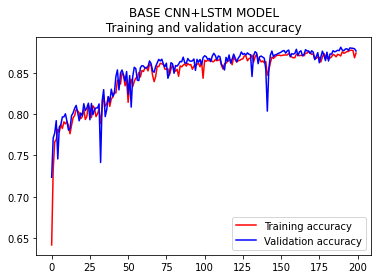

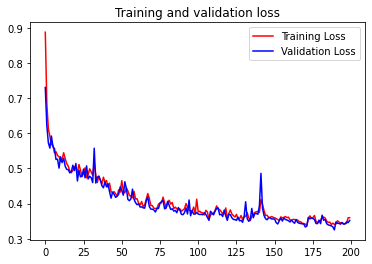

average_accuracy= 0.8508979558944703
precision= 0.8807435631752014
average_loss= 0.40129721716046335


In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('BASE CNN+LSTM MODEL\n Training and validation accuracy ')
plt.savefig('./images/FIG_3/A1.eps', format='eps',dpi=1000)
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('./images/FIG_3/A2.eps', format='eps',dpi=1000)
plt.show()
average_accuracy=sum(history.history['val_acc'])/len(history.history['val_acc'])
precision = max(history.history['val_acc'])
print("average_accuracy=",average_accuracy)
print("precision=",precision)
average_loss=sum(history.history['val_loss'])/len(history.history['val_loss'])
print("average_loss=",average_loss)


In [16]:
red_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1,mode='auto', min_delta=0.01,min_lr=0.0001)
old =0
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self,epoch,logs={}):
            global old
            if(logs.get('val_acc') > old):
                model.save('NF_LocallyConnected1D.h5',overwrite=True)
                old = logs.get('val_acc')
saver =myCallback()

model = tf.keras.models.Sequential([
    tf.keras.layers.LocallyConnected1D(16, (5),activation='relu',strides =1,padding="valid", input_shape=[21,1]),
    tf.keras.layers.LSTM(128,return_sequences=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='softmax')
    ])
model.compile(optimizer='nadam'  ,loss='categorical_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=8192,verbose =1)#, callbacks = [red_lr])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
locally_connected1d_3 (Local (None, 17, 16)            1632      
_________________________________________________________________
lstm_5 (LSTM)                (None, 17, 128)           74240     
_________________________________________________________________
flatten_5 (Flatten)          (None, 2176)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 8708      
Total params: 84,580
Trainable params: 84,580
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
27/27 [==============================] - 2s 88ms/step - loss: 0.8572 - acc: 0.6700 - val_loss: 0.6746 - val_acc: 0.7367
Epoch 2/200
27/27 [==============================] - 2s 73ms/step - loss: 0.6354 - acc: 0.7584 - val_loss: 0.5857 - 

27/27 [==============================] - 2s 74ms/step - loss: 0.3618 - acc: 0.8653 - val_loss: 0.3463 - val_acc: 0.8715
Epoch 57/200
27/27 [==============================] - 2s 74ms/step - loss: 0.3566 - acc: 0.8658 - val_loss: 0.3575 - val_acc: 0.8680
Epoch 58/200
27/27 [==============================] - 2s 73ms/step - loss: 0.3624 - acc: 0.8653 - val_loss: 0.3513 - val_acc: 0.8707
Epoch 59/200
27/27 [==============================] - 2s 73ms/step - loss: 0.3621 - acc: 0.8670 - val_loss: 0.3509 - val_acc: 0.8725
Epoch 60/200
27/27 [==============================] - 2s 73ms/step - loss: 0.3661 - acc: 0.8632 - val_loss: 0.3842 - val_acc: 0.8514
Epoch 61/200
27/27 [==============================] - 2s 74ms/step - loss: 0.3781 - acc: 0.8595 - val_loss: 0.3583 - val_acc: 0.8726
Epoch 62/200
27/27 [==============================] - 2s 73ms/step - loss: 0.3609 - acc: 0.8701 - val_loss: 0.3599 - val_acc: 0.8711
Epoch 63/200
27/27 [==============================] - 2s 75ms/step - loss: 0.3633 

27/27 [==============================] - 2s 78ms/step - loss: 0.3001 - acc: 0.8850 - val_loss: 0.3050 - val_acc: 0.8828
Epoch 179/200
27/27 [==============================] - 2s 74ms/step - loss: 0.3052 - acc: 0.8832 - val_loss: 0.3015 - val_acc: 0.8845
Epoch 180/200
27/27 [==============================] - 2s 76ms/step - loss: 0.3036 - acc: 0.8842 - val_loss: 0.3039 - val_acc: 0.8850
Epoch 181/200
27/27 [==============================] - 2s 75ms/step - loss: 0.3038 - acc: 0.8842 - val_loss: 0.3067 - val_acc: 0.8868
Epoch 182/200
27/27 [==============================] - 2s 74ms/step - loss: 0.3080 - acc: 0.8857 - val_loss: 0.3055 - val_acc: 0.8862
Epoch 183/200
27/27 [==============================] - 2s 81ms/step - loss: 0.3113 - acc: 0.8842 - val_loss: 0.3094 - val_acc: 0.8862
Epoch 184/200
27/27 [==============================] - 2s 76ms/step - loss: 0.3273 - acc: 0.8782 - val_loss: 0.3091 - val_acc: 0.8876
Epoch 185/200
27/27 [==============================] - 2s 79ms/step - loss: 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


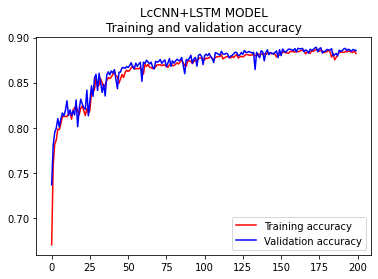

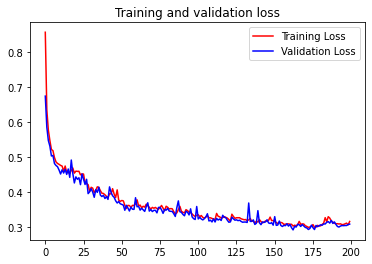

average_accuracy= 0.8680464562773704
precision= 0.8892230987548828
average_loss= 0.3534287446737289


In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('LcCNN+LSTM MODEL\nTraining and validation accuracy')
plt.savefig('./images/FIG_3/B1.eps', format='eps',dpi=1000)
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('./images/FIG_3/B2.eps', format='eps',dpi=1000)
plt.show()
average_accuracy=sum(history.history['val_acc'])/len(history.history['val_acc'])
precision = max(history.history['val_acc'])
print("average_accuracy=",average_accuracy)
print("precision=",precision)
average_loss=sum(history.history['val_loss'])/len(history.history['val_loss'])
print("average_loss=",average_loss)


In [18]:
red_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1,mode='auto', min_delta=0.01,min_lr=0.0001)
old =0
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self,epoch,logs={}):
            global old
            if(logs.get('val_acc') > old):
                model.save('NF_LocallyConnected1D.h5',overwrite=True)
                old = logs.get('val_acc')
saver =myCallback()
#88.92
model = tf.keras.models.Sequential([
    tf.keras.layers.LocallyConnected1D(16, (5),activation='relu',strides =1,padding="valid", input_shape=[21,1]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True)),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(4, activation='softmax')
    ])
model.compile(optimizer='nadam'  ,loss='categorical_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=1000,verbose =1)#, callbacks = [red_lr,saver])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
locally_connected1d_4 (Local (None, 17, 16)            1632      
_________________________________________________________________
bidirectional_2 (Bidirection (None, 17, 256)           148480    
_________________________________________________________________
flatten_6 (Flatten)          (None, 4352)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 17412     
Total params: 167,524
Trainable params: 167,524
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
221/221 [==============================] - 6s 29ms/step - loss: 0.5391 - acc: 0.8016 - val_loss: 0.4292 - val_acc: 0.8483
Epoch 2/200
221/221 [==============================] - 6s 26ms/step - loss: 0.4368 - acc: 0.8399 - val_loss: 0.3

221/221 [==============================] - 6s 25ms/step - loss: 0.2586 - acc: 0.8992 - val_loss: 0.2548 - val_acc: 0.8992
Epoch 116/200
221/221 [==============================] - 6s 25ms/step - loss: 0.2550 - acc: 0.9001 - val_loss: 0.2580 - val_acc: 0.9004
Epoch 117/200
221/221 [==============================] - 6s 25ms/step - loss: 0.2648 - acc: 0.8976 - val_loss: 0.2622 - val_acc: 0.8988
Epoch 118/200
221/221 [==============================] - 6s 25ms/step - loss: 0.2602 - acc: 0.8985 - val_loss: 0.2689 - val_acc: 0.8970
Epoch 119/200
221/221 [==============================] - 6s 25ms/step - loss: 0.2592 - acc: 0.8989 - val_loss: 0.2706 - val_acc: 0.8941
Epoch 120/200
221/221 [==============================] - 6s 25ms/step - loss: 0.2612 - acc: 0.8982 - val_loss: 0.2628 - val_acc: 0.8986
Epoch 121/200
221/221 [==============================] - 6s 26ms/step - loss: 0.2549 - acc: 0.9000 - val_loss: 0.2553 - val_acc: 0.9002
Epoch 122/200
221/221 [==============================] - 6s 25

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


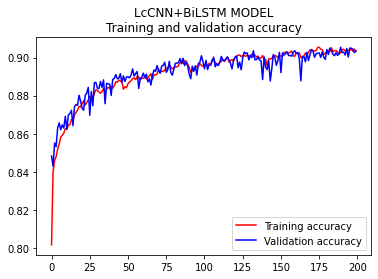

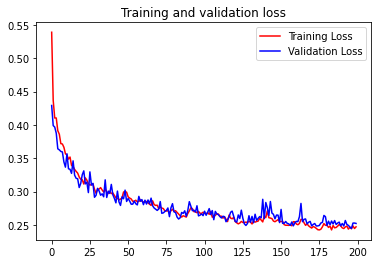

average_accuracy= 0.8923843136429787
precision= 0.9053848385810852
average_loss= 0.2784348997473717


In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('LcCNN+BiLSTM MODEL\nTraining and validation accuracy')
plt.savefig('./images/FIG_3/C1.eps', format='eps',dpi=1000)
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('./images/FIG_3/C2.eps', format='eps',dpi=1000)
plt.show()
average_accuracy=sum(history.history['val_acc'])/len(history.history['val_acc'])
precision = max(history.history['val_acc'])
print("average_accuracy=",average_accuracy)
print("precision=",precision)
average_loss=sum(history.history['val_loss'])/len(history.history['val_loss'])
print("average_loss=",average_loss)


In [20]:
red_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1,mode='auto', min_delta=0.01,min_lr=0.0001)
old =0
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self,epoch,logs={}):
            global old
            if(logs.get('val_acc') > old):
                model.save('NF_LocallyConnected1D.h5',overwrite=True)
                old = logs.get('val_acc')
saver =myCallback()
#88.92
model = tf.keras.models.Sequential([
    tf.keras.layers.LocallyConnected1D(16, (5),activation='relu',strides =1,padding="valid", input_shape=[21,1]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True)),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(4, activation='softmax')
    ])
model.compile(optimizer='nadam'  ,loss='categorical_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=1000,verbose =1, callbacks = [red_lr])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
locally_connected1d_5 (Local (None, 17, 16)            1632      
_________________________________________________________________
bidirectional_3 (Bidirection (None, 17, 256)           148480    
_________________________________________________________________
flatten_7 (Flatten)          (None, 4352)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 17412     
Total params: 167,524
Trainable params: 167,524
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
221/221 [==============================] - 6s 29ms/step - loss: 0.5537 - acc: 0.7912 - val_loss: 0.4224 - val_acc: 0.8474 - lr: 0.0010
Epoch 2/200
221/221 [==============================] - 6s 25ms/step - loss: 0.4380 - acc: 0.8391 - 

221/221 [==============================] - 6s 25ms/step - loss: 0.2422 - acc: 0.9046 - val_loss: 0.2432 - val_acc: 0.9038 - lr: 1.0000e-04
Epoch 100/200
221/221 [==============================] - 6s 25ms/step - loss: 0.2414 - acc: 0.9049 - val_loss: 0.2412 - val_acc: 0.9048 - lr: 1.0000e-04
Epoch 101/200
221/221 [==============================] - 6s 26ms/step - loss: 0.2413 - acc: 0.9045 - val_loss: 0.2425 - val_acc: 0.9061 - lr: 1.0000e-04
Epoch 102/200
221/221 [==============================] - 6s 26ms/step - loss: 0.2402 - acc: 0.9047 - val_loss: 0.2393 - val_acc: 0.9061 - lr: 1.0000e-04
Epoch 103/200
221/221 [==============================] - 6s 26ms/step - loss: 0.2407 - acc: 0.9052 - val_loss: 0.2417 - val_acc: 0.9044 - lr: 1.0000e-04
Epoch 104/200
221/221 [==============================] - 6s 26ms/step - loss: 0.2413 - acc: 0.9045 - val_loss: 0.2424 - val_acc: 0.9059 - lr: 1.0000e-04
Epoch 105/200
221/221 [==============================] - 6s 26ms/step - loss: 0.2411 - acc: 0.90

In [22]:
# red_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1,mode='auto', min_delta=0.01,min_lr=0.0001)
# old =0
# class myCallback(tf.keras.callbacks.Callback):
#         def on_epoch_end(self,epoch,logs={}):
#             global old
#             if(logs.get('val_acc') > old):
#                 model.save('NF_LocallyConnected1D.h5',overwrite=True)
#                 old = logs.get('val_acc')
# saver =myCallback()
# #88.92
# model = tf.keras.models.Sequential([
#     tf.keras.layers.LocallyConnected1D(16, (5),activation='relu',strides =1,padding="valid", input_shape=[21,1]),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True)),
#     tf.keras.layers.Flatten(),
    
#     tf.keras.layers.Dense(4, activation='softmax')
#     ])
# model.compile(optimizer='nadam'  ,loss='categorical_crossentropy', metrics=['acc'])
# model.summary()
# history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=1000,verbose =1, callbacks = [red_lr])